In [15]:
import pandas as pd

# Load the dataset
df = pd.read_csv("dermatology_database_1.csv")  # Adjust path if needed

# Convert 'age' to numeric, force errors to NaN
df['age'] = pd.to_numeric(df['age'], errors='coerce')

# Drop rows with any missing values (especially age)
df_cleaned = df.dropna()

# Confirm result
print("After cleaning:")
print(df_cleaned.info())

After cleaning:
<class 'pandas.core.frame.DataFrame'>
Index: 358 entries, 0 to 365
Data columns (total 35 columns):
 #   Column                               Non-Null Count  Dtype  
---  ------                               --------------  -----  
 0   erythema                             358 non-null    int64  
 1   scaling                              358 non-null    int64  
 2   definite_borders                     358 non-null    int64  
 3   itching                              358 non-null    int64  
 4   koebner_phenomenon                   358 non-null    int64  
 5   polygonal_papules                    358 non-null    int64  
 6   follicular_papules                   358 non-null    int64  
 7   oral_mucosal_involvement             358 non-null    int64  
 8   knee_and_elbow_involvement           358 non-null    int64  
 9   scalp_involvement                    358 non-null    int64  
 10  family_history                       358 non-null    int64  
 11  melanin_incontinence 

In [16]:
print(df.isnull().sum())

erythema                               0
scaling                                0
definite_borders                       0
itching                                0
koebner_phenomenon                     0
polygonal_papules                      0
follicular_papules                     0
oral_mucosal_involvement               0
knee_and_elbow_involvement             0
scalp_involvement                      0
family_history                         0
melanin_incontinence                   0
eosinophils_infiltrate                 0
PNL_infiltrate                         0
fibrosis_papillary_dermis              0
exocytosis                             0
acanthosis                             0
hyperkeratosis                         0
parakeratosis                          0
clubbing_rete_ridges                   0
elongation_rete_ridges                 0
thinning_suprapapillary_epidermis      0
spongiform_pustule                     0
munro_microabcess                      0
focal_hypergranu

In [18]:
df_cleaned = df.dropna()

In [19]:
df_cleaned.info()

<class 'pandas.core.frame.DataFrame'>
Index: 358 entries, 0 to 365
Data columns (total 35 columns):
 #   Column                               Non-Null Count  Dtype  
---  ------                               --------------  -----  
 0   erythema                             358 non-null    int64  
 1   scaling                              358 non-null    int64  
 2   definite_borders                     358 non-null    int64  
 3   itching                              358 non-null    int64  
 4   koebner_phenomenon                   358 non-null    int64  
 5   polygonal_papules                    358 non-null    int64  
 6   follicular_papules                   358 non-null    int64  
 7   oral_mucosal_involvement             358 non-null    int64  
 8   knee_and_elbow_involvement           358 non-null    int64  
 9   scalp_involvement                    358 non-null    int64  
 10  family_history                       358 non-null    int64  
 11  melanin_incontinence                 

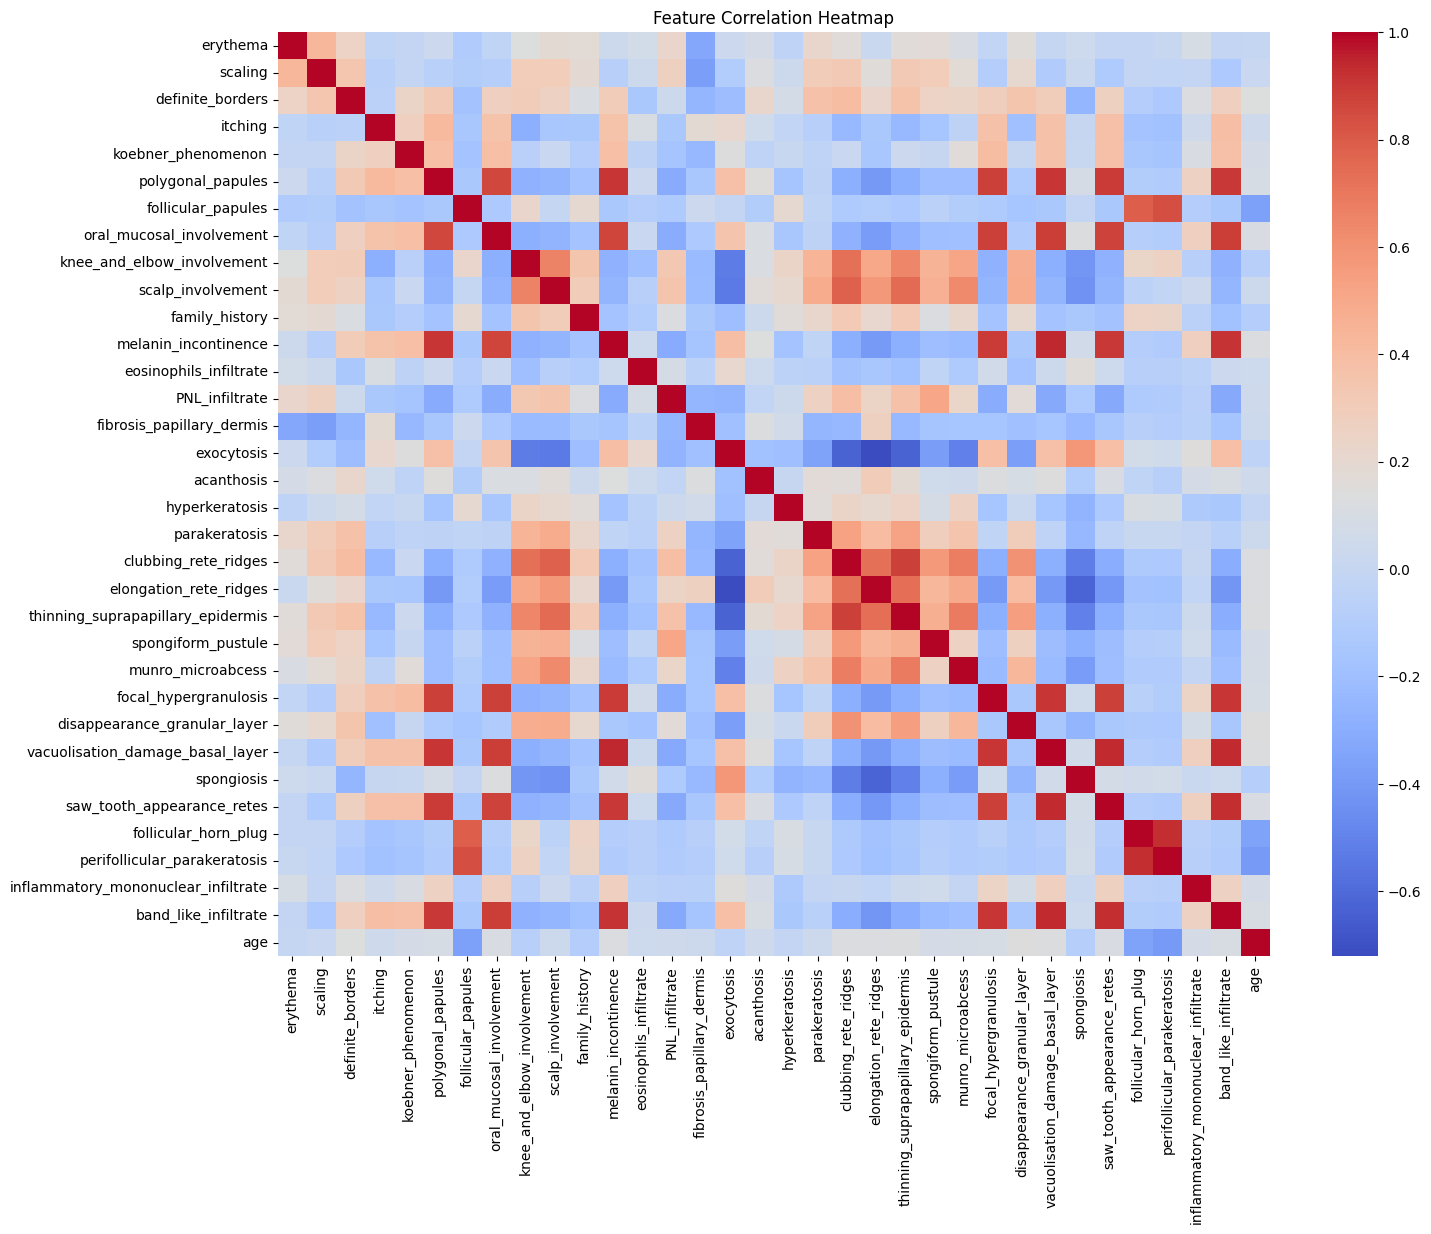

In [20]:
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(16, 12))
correlation_matrix = df_cleaned.drop(columns='class').corr()
sns.heatmap(correlation_matrix, cmap='coolwarm', annot=False)
plt.title('Feature Correlation Heatmap')
plt.show()


C:\Users\aroma\AppData\Local\Temp\ipykernel_2892\471827810.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='class', y='age', data=df_cleaned, palette="Set3")


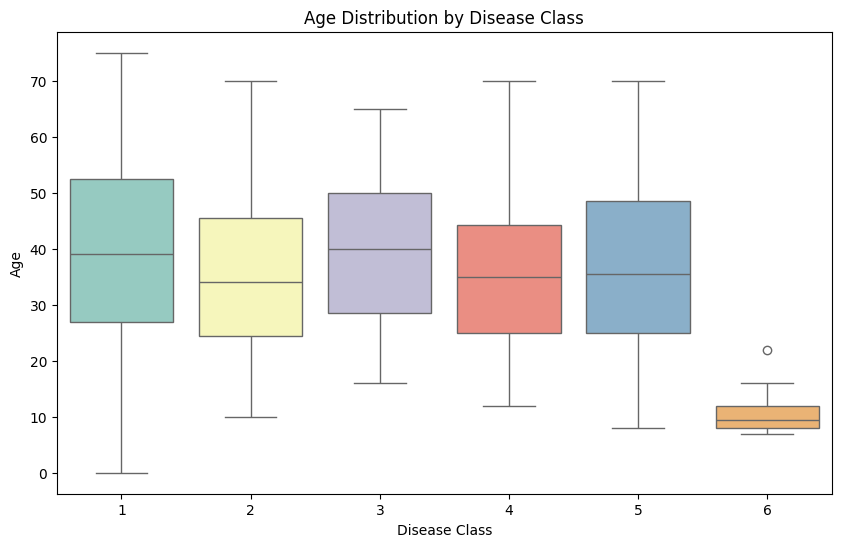

In [21]:
plt.figure(figsize=(10, 6))
sns.boxplot(x='class', y='age', data=df_cleaned, palette="Set3")
plt.title('Age Distribution by Disease Class')
plt.xlabel('Disease Class')
plt.ylabel('Age')
plt.show()

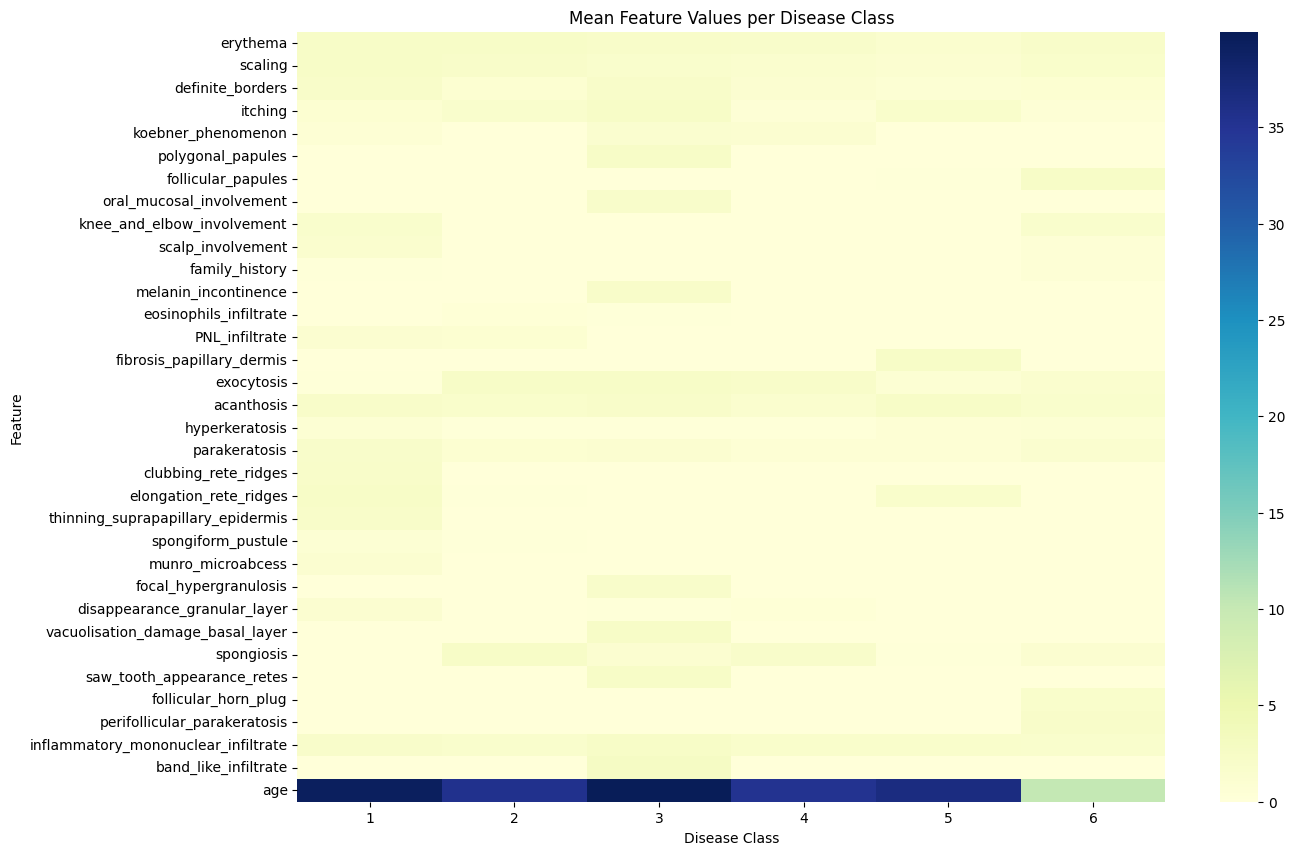

In [22]:
df_grouped = df_cleaned.groupby('class').mean().transpose()
plt.figure(figsize=(14, 10))
sns.heatmap(df_grouped, cmap='YlGnBu')
plt.title('Mean Feature Values per Disease Class')
plt.xlabel('Disease Class')
plt.ylabel('Feature')
plt.show()


In [23]:
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score

# 1. Split data
X = df_cleaned.drop(columns='class')
y = df_cleaned['class']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# 2. Train model
model = RandomForestClassifier(random_state=42)
model.fit(X_train, y_train)

# 3. Predict
y_pred = model.predict(X_test)

# 4. Evaluate
print("Accuracy:", accuracy_score(y_test, y_pred))
print("\nClassification Report:\n", classification_report(y_test, y_pred))
print("\nConfusion Matrix:\n", confusion_matrix(y_test, y_pred))


Accuracy: 0.9861111111111112

Classification Report:
               precision    recall  f1-score   support

           1       1.00      1.00      1.00        22
           2       1.00      0.93      0.96        14
           3       1.00      1.00      1.00        14
           4       0.89      1.00      0.94         8
           5       1.00      1.00      1.00        12
           6       1.00      1.00      1.00         2

    accuracy                           0.99        72
   macro avg       0.98      0.99      0.98        72
weighted avg       0.99      0.99      0.99        72


Confusion Matrix:
 [[22  0  0  0  0  0]
 [ 0 13  0  1  0  0]
 [ 0  0 14  0  0  0]
 [ 0  0  0  8  0  0]
 [ 0  0  0  0 12  0]
 [ 0  0  0  0  0  2]]


In [25]:
# Example mapping of disease class to cream
cream_dict = {
    1: "Betamethasone",
    2: "Clobetasol",
    3: "Hydrocortisone",
    4: "Tacrolimus",
    5: "Mometasone",
    6: "Calcipotriol"
    # Add more if more disease classes exist
}

# After prediction:
predicted_class = model.predict(X_test)
recommended_creams = [cream_dict.get(cls, "Consult a dermatologist") for cls in predicted_class]


In [26]:
import joblib

# Save model
joblib.dump(model, "skin_disease_model.pkl")

# Load model later
# model = joblib.load("skin_disease_model.pkl")

['skin_disease_model.pkl']

In [27]:
import pandas as pd

# Create a table with actual and predicted class, and recommended creams
results_df = pd.DataFrame({
    "Actual Class": y_test,
    "Predicted Class": y_pred,
    "Recommended Cream": recommended_creams
})

results_df.head()

,Actual Class,Predicted Class,Recommended Cream
227,5,5,Mometasone
46,4,4,Tacrolimus
269,4,4,Tacrolimus
309,1,1,Betamethasone
60,6,6,Calcipotriol


In [28]:
results_df.to_csv("skin_disease_predictions_with_creams.csv", index=False)

In [29]:
import joblib

model1 = joblib.load("skin_disease_model.pkl")
model2 = joblib.load("skin_disease_rf_model.pkl")

print("Model 1:", type(model1))
print("Model 2:", type(model2))


Model 1: <class 'sklearn.ensemble._forest.RandomForestClassifier'>
Model 2: <class 'sklearn.ensemble._forest.RandomForestClassifier'>


In [34]:
import pandas as pd
import joblib

# Load your trained model (Random Forest or SVC)
model = joblib.load("skin_disease_rf_model.pkl")  # or "skin_disease_model.pkl"

# Predict
y_pred = model.predict(X_test)

# Mapping of class to (disease name, cream recommendation)
skindisease_prediction_with_creams = {
    1: ("Psoriasis", "Betamethasone", "Apply thinly once daily"),
    2: ("Seborrheic Dermatitis", "Clobetasol", "Apply twice daily for 2 weeks"),
    3: ("Lichen Planus", "Hydrocortisone", "Apply 2-3 times daily"),
    4: ("Pityriasis Rosea", "Tacrolimus", "Apply once daily"),
    5: ("Chronic Dermatitis", "Mometasone", "Apply once daily at night"),
    6: ("Pityriasis Rubra Pilaris", "Calcipotriol", "Apply twice daily"),
    7: ("Atopic Dermatitis", "Desonide", "Apply twice daily"),
    8: ("Contact Dermatitis", "Fluocinonide", "Apply sparingly twice a day"),
    9: ("Eczema", "Triamcinolone", "Apply once or twice daily"),
    10: ("Rosacea", "Tretinoin", "Apply at night only"),
    11: ("Vitiligo", "Pimecrolimus", "Apply twice daily for 6 weeks"),
    12: ("Lupus Erythematosus", "Coal Tar", "Apply once daily"),
    13: ("Acne Vulgaris", "Benzoyl Peroxide", "Apply in the morning"),
    14: ("Ichthyosis Vulgaris", "Salicylic Acid", "Apply twice daily"),
    15: ("Fungal Infection", "Ketoconazole", "Apply once daily for 2 weeks"),
    16: ("Tinea Corporis", "Econazole", "Apply twice daily"),
    17: ("Perioral Dermatitis", "Metronidazole", "Apply twice daily"),
    18: ("Melasma", "Azelaic Acid", "Apply morning and evening"),
    19: ("Xerosis", "Urea Cream", "Apply generously after bathing"),
    20: ("Diaper Rash", "Zinc Oxide", "Apply with each diaper change")
}

# Convert actual and predicted labels to disease names and creams
actual_diseases = [skindisease_prediction_with_creams.get(label, ("Unknown", "Unknown"))[0] for label in y_test]
predicted_diseases = [skindisease_prediction_with_creams.get(label, ("Unknown", "Unknown"))[0] for label in y_pred]
recommended_creams = [skindisease_prediction_with_creams.get(label, ("Unknown", "Consult a dermatologist"))[1] for label in y_pred]

# Final results DataFrame
results_df = pd.DataFrame({
    "Actual Disease": actual_diseases,
    "Predicted Disease": predicted_diseases,
    "Recommended Cream": recommended_creams
})

# Display first 5 rows
print(results_df.head())

# Save to CSV
results_df.to_csv("skindisease_prediction_with_creams.csv", index=False)
print("✅ File saved: 'skindisease_prediction_with_creams.csv'")


             Actual Disease         Predicted Disease Recommended Cream
0        Chronic Dermatitis        Chronic Dermatitis        Mometasone
1          Pityriasis Rosea          Pityriasis Rosea        Tacrolimus
2          Pityriasis Rosea          Pityriasis Rosea        Tacrolimus
3                 Psoriasis                 Psoriasis     Betamethasone
4  Pityriasis Rubra Pilaris  Pityriasis Rubra Pilaris      Calcipotriol
✅ File saved: 'skindisease_prediction_with_creams.csv'


C:\Users\aroma\AppData\Local\Temp\ipykernel_2892\2449955183.py:9: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=cream_counts.values, y=cream_counts.index, palette="viridis")


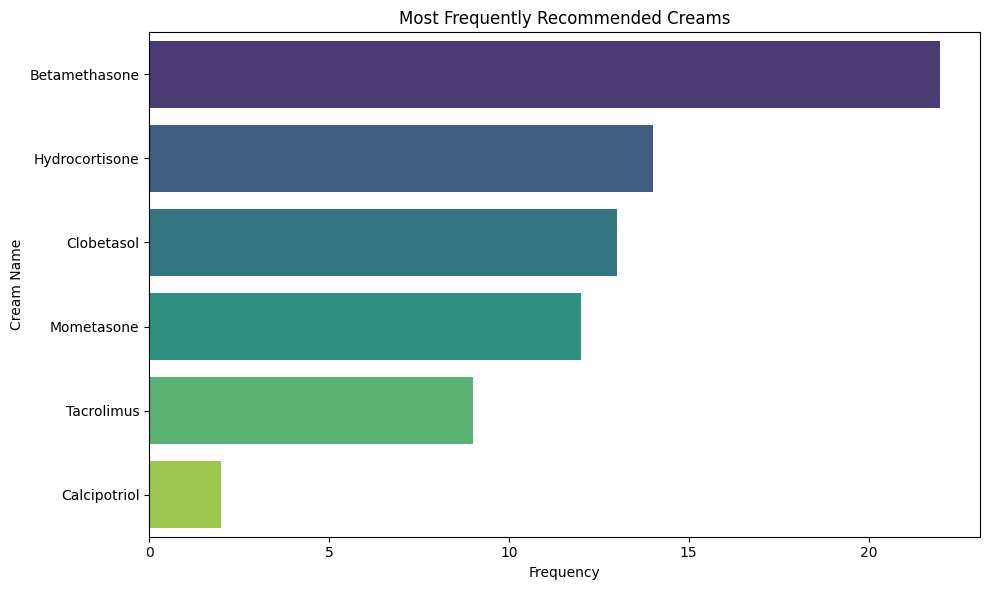

In [35]:
import matplotlib.pyplot as plt
import seaborn as sns

# Count recommended creams
cream_counts = results_df['Recommended Cream'].value_counts()

# Plot
plt.figure(figsize=(10, 6))
sns.barplot(x=cream_counts.values, y=cream_counts.index, palette="viridis")
plt.title("Most Frequently Recommended Creams")
plt.xlabel("Frequency")
plt.ylabel("Cream Name")
plt.tight_layout()
plt.show()

In [36]:
# Example input: Replace with real patient data
new_patient_features = np.array([[0, 1, 3, 3, 0, 2, 1, 0, 1, 3, 2, 1]])  # shape (1, n_features)

In [37]:
# Get the feature names from your training data
print(X.columns.tolist())

['erythema', 'scaling', 'definite_borders', 'itching', 'koebner_phenomenon', 'polygonal_papules', 'follicular_papules', 'oral_mucosal_involvement', 'knee_and_elbow_involvement', 'scalp_involvement', 'family_history', 'melanin_incontinence', 'eosinophils_infiltrate', 'PNL_infiltrate', 'fibrosis_papillary_dermis', 'exocytosis', 'acanthosis', 'hyperkeratosis', 'parakeratosis', 'clubbing_rete_ridges', 'elongation_rete_ridges', 'thinning_suprapapillary_epidermis', 'spongiform_pustule', 'munro_microabcess', 'focal_hypergranulosis', 'disappearance_granular_layer', 'vacuolisation_damage_basal_layer', 'spongiosis', 'saw_tooth_appearance_retes', 'follicular_horn_plug', 'perifollicular_parakeratosis', 'inflammatory_mononuclear_infiltrate', 'band_like_infiltrate', 'age']


In [40]:
import numpy as np
import pandas as pd

# Example: use 34 values matching your dataset structure
# Replace these numbers with actual patient data
new_patient_features = np.array([[2, 1, 3, 0, 1, 0, 2, 0, 0, 1, 
                                  2, 1, 1, 0, 2, 0, 3, 1, 0, 1, 
                                  1, 0, 0, 1, 0, 2, 1, 1, 1, 0, 
                                  0, 1, 0, 45]])  # 34 values (last one is age)

# Predict
predicted_class = model.predict(new_patient_features)[0]

# Get disease info
disease_name, cream, dosage = skindisease_prediction_with_creams.get(
    predicted_class, 
    ("Unknown", "N/A", "Consult a dermatologist")
)

# Output result
print(f"Predicted Disease: {disease_name}")
print(f"Recommended Cream: {cream}")
print(f"Dosage Instructions: {dosage}")


Predicted Disease: Psoriasis
Recommended Cream: Betamethasone
Dosage Instructions: Apply thinly once daily


C:\Users\aroma\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\utils\validation.py:2749: UserWarning: X does not have valid feature names, but RandomForestClassifier was fitted with feature names
  warnings.warn(


In [41]:
df['class'].value_counts()

class
1    112
3     72
2     61
5     52
4     49
6     20
Name: count, dtype: int64

In [44]:

import joblib

# Replace pickle with joblib
model = joblib.load("skin_disease_rf_model.pkl")


In [45]:
pip install joblib


Note: you may need to restart the kernel to use updated packages.


In [51]:

import joblib

# Replace pickle with joblib
model = joblib.load("skin_disease_rf_model.pkl")

In [55]:
import pickle

with open("skin_disease_rf_model.pkl", "wb") as f:
    pickle.dump(model, f)

In [56]:
import pickle

with open("skin_disease_rf_model.pkl", "rb") as f:
    content = f.read(100)
    print(content[:20])


b'\x80\x04\x95\r\t\x01\x00\x00\x00\x00\x00\x8c\x18sklearn'
